# Blackpink members recognition

## importando algumas bibliotecas:

In [7]:
import boto3
from PIL import Image
%matplotlib inline

### Agora precisamos de uma imagem que vamos processar, essa imagem vai ser enviada para a API do rekognition para retornar o seu resultado

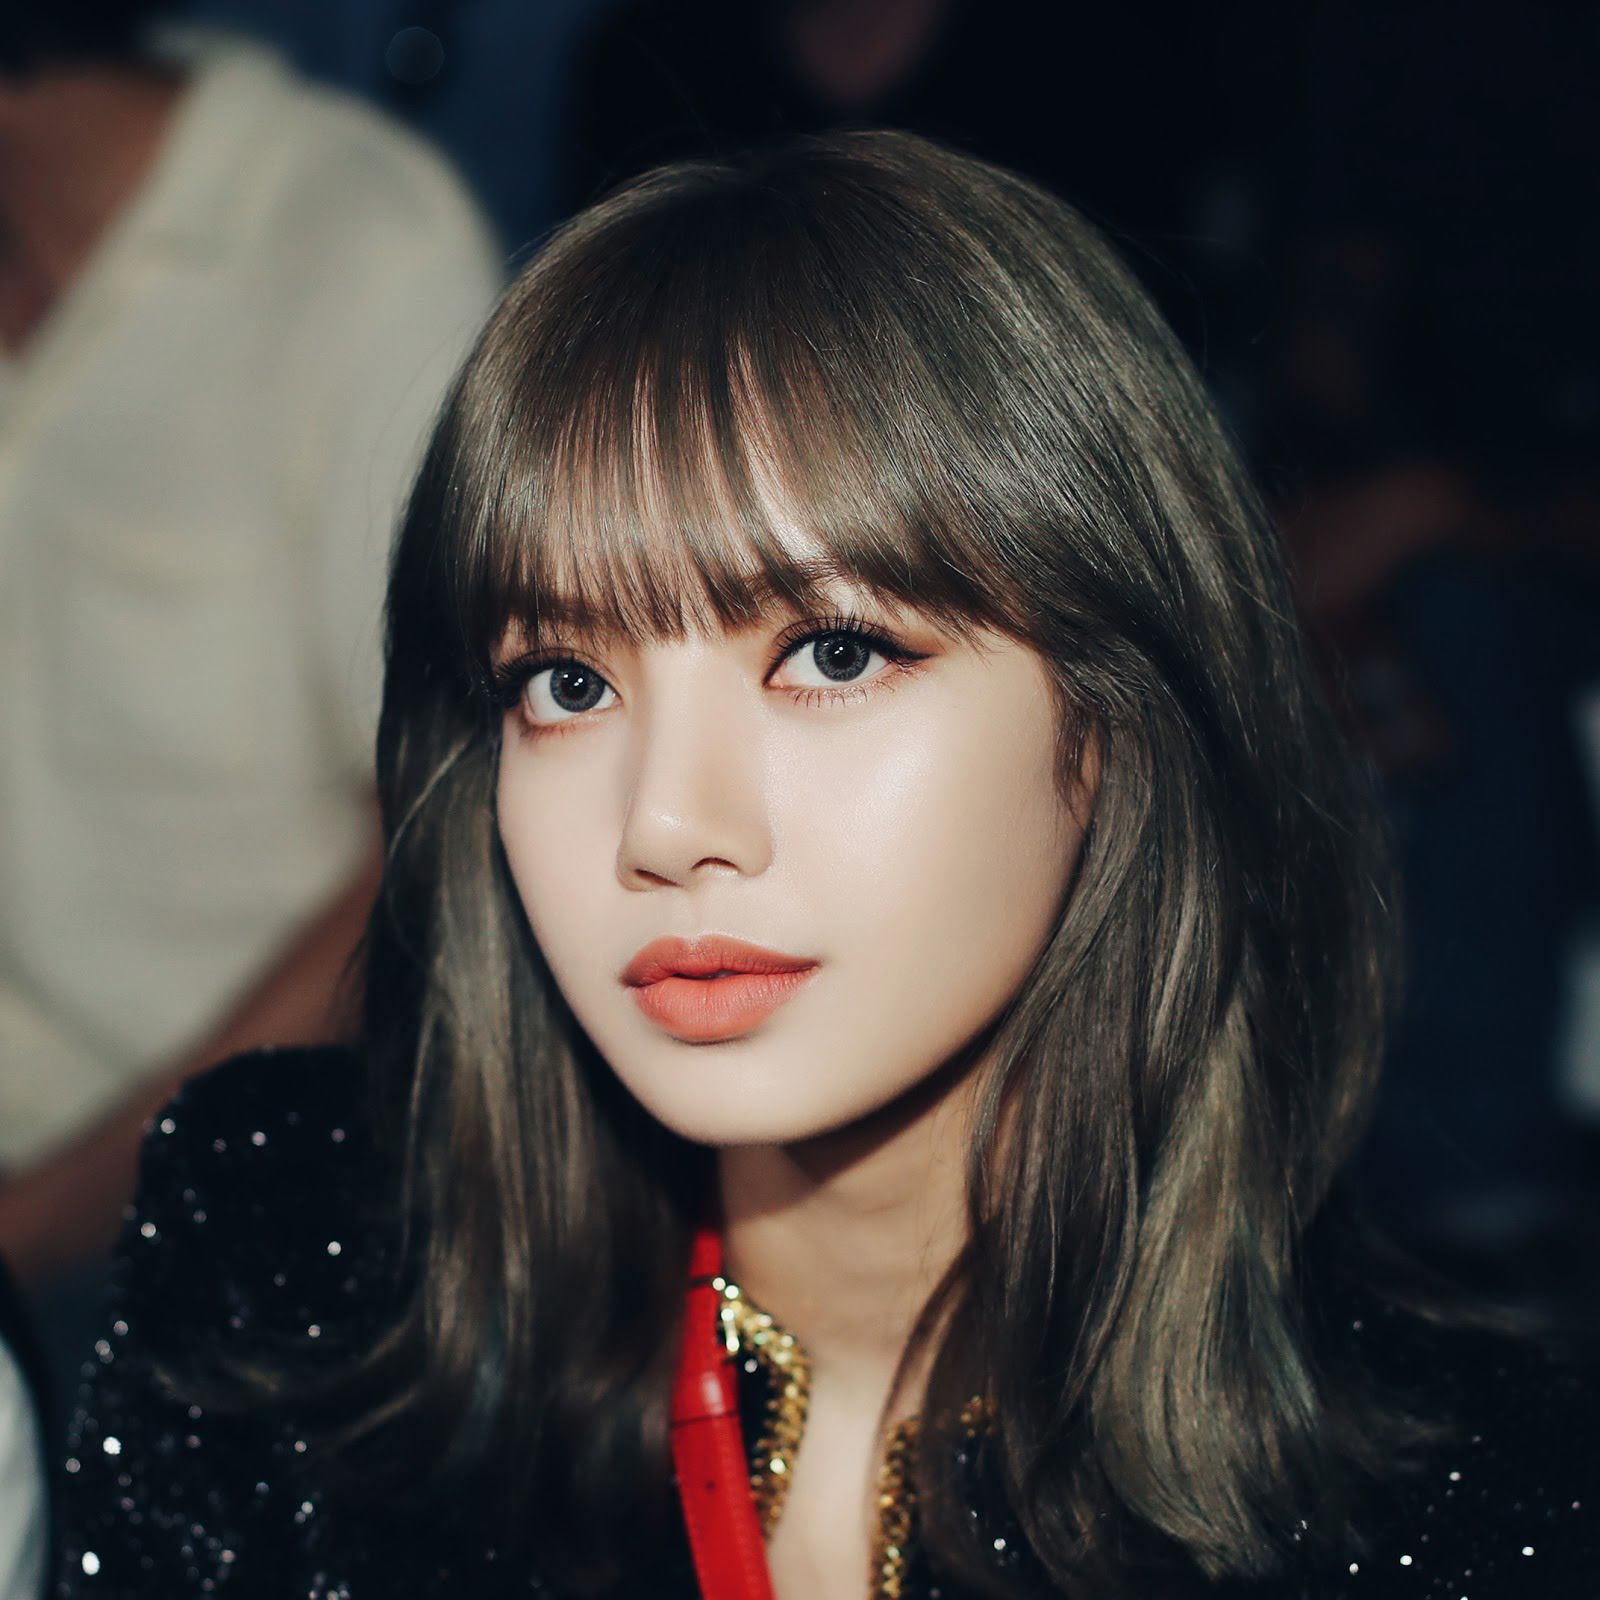

In [9]:
display(Image.open('face-recognition/lisa.jpg'))

### Agora chamamos o serviço de reconhecimento facial com a imagem dada, que daí ele vai nos retornar os valores com todas as informações sobre a imagem

In [13]:
import io
rekognition = boto3.client('rekognition')
image = Image.open('face-recognition/lisa.jpg')
stream = io.BytesIO()
image.save(stream,format="JPEG")
image_binary = stream.getvalue()
rekognition.detect_faces(
Image={'Bytes':image_binary},
    Attributes=['ALL']
)

{'FaceDetails': [{'BoundingBox': {'Width': 0.3656253516674042,
    'Height': 0.49526673555374146,
    'Left': 0.30540019273757935,
    'Top': 0.22819212079048157},
   'AgeRange': {'Low': 9, 'High': 17},
   'Smile': {'Value': False, 'Confidence': 94.90206909179688},
   'Eyeglasses': {'Value': False, 'Confidence': 96.8218765258789},
   'Sunglasses': {'Value': False, 'Confidence': 99.99637603759766},
   'Gender': {'Value': 'Female', 'Confidence': 99.99773406982422},
   'Beard': {'Value': False, 'Confidence': 95.96065521240234},
   'Mustache': {'Value': False, 'Confidence': 98.42413330078125},
   'EyesOpen': {'Value': True, 'Confidence': 98.06509399414062},
   'MouthOpen': {'Value': False, 'Confidence': 94.2118911743164},
   'Emotions': [{'Type': 'CALM', 'Confidence': 96.75818634033203},
    {'Type': 'SURPRISED', 'Confidence': 6.44700813293457},
    {'Type': 'FEAR', 'Confidence': 5.937589645385742},
    {'Type': 'SAD', 'Confidence': 2.5541863441467285},
    {'Type': 'CONFUSED', 'Confidence

### Agora vamos comparar faces, se eu escolher uma foto de uma das membros do blackpink como fonte (usando a foto que eu escolhi anteriormente), e então enviar uma foto do grupo inteiro, o serviço de reconhecimento vai encontrar o rosto na foto em grupo

In [14]:
sourceFile='face-recognition/lisa.jpg'
targetFile='face-recognition/blackpink_group.jpg'
   
imageSource=open(sourceFile,'rb')
imageTarget=open(targetFile,'rb')
response = rekognition.compare_faces(SimilarityThreshold=80,
                              SourceImage={'Bytes': imageSource.read()},
                              TargetImage={'Bytes': imageTarget.read()})
response['FaceMatches']

[{'Similarity': 99.99874877929688,
  'Face': {'BoundingBox': {'Width': 0.08511628955602646,
    'Height': 0.18859434127807617,
    'Left': 0.21278300881385803,
    'Top': 0.40395694971084595},
   'Confidence': 99.99655151367188,
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.2283894568681717,
     'Y': 0.47125521302223206},
    {'Type': 'eyeRight', 'X': 0.2664409875869751, 'Y': 0.4672308564186096},
    {'Type': 'mouthLeft', 'X': 0.23038597404956818, 'Y': 0.542617917060852},
    {'Type': 'mouthRight', 'X': 0.26207059621810913, 'Y': 0.53939288854599},
    {'Type': 'nose', 'X': 0.23922304809093475, 'Y': 0.49825355410575867}],
   'Pose': {'Roll': -4.0902838706970215,
    'Yaw': -14.69178581237793,
    'Pitch': 16.03556251525879},
   'Quality': {'Brightness': 72.63623809814453,
    'Sharpness': 67.22731018066406}}}]

### O resultado acima parece ter retornado uma similaridade de 99%, de acordo com a Bounding Box, vamos ver qual rosto o rekognition deu match na imagem em grupo.

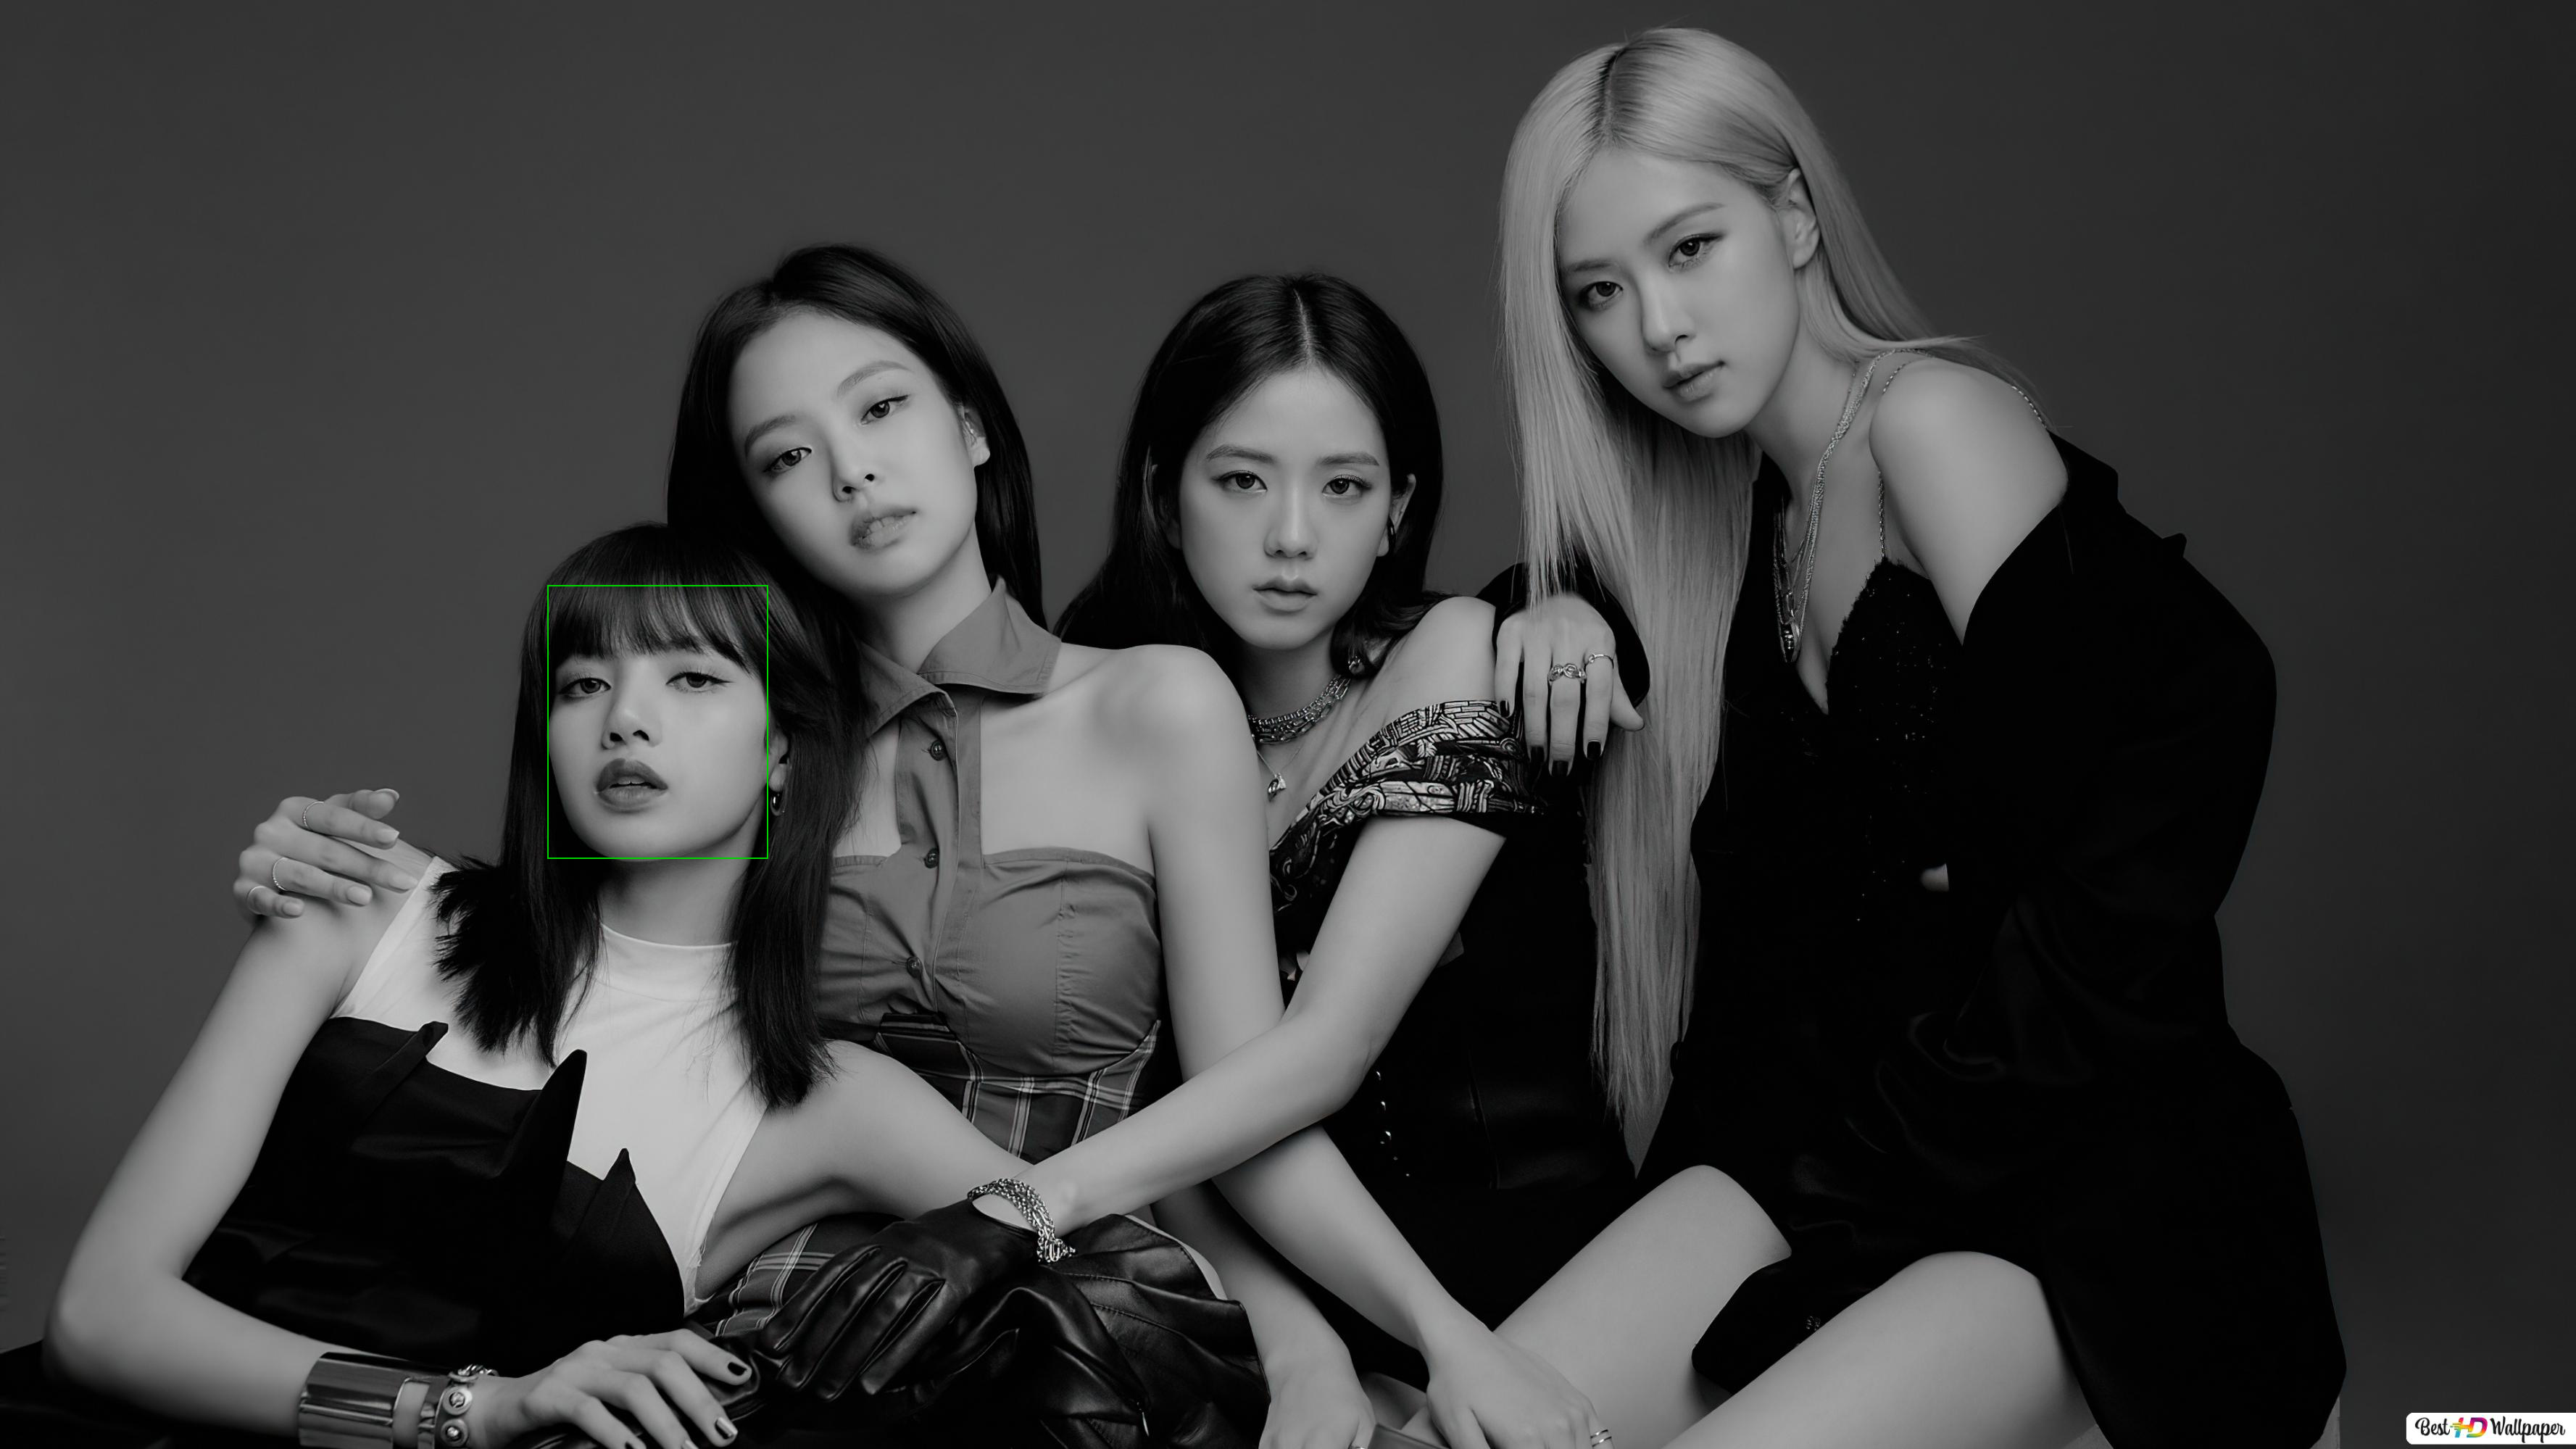

In [15]:
from PIL import ImageDraw
image = Image.open('face-recognition/blackpink_group.jpg')
imgWidth,imgHeight  = image.size  
draw = ImageDraw.Draw(image)
box = response['FaceMatches'][0]['Face']['BoundingBox']
left = imgWidth * box['Left']
top = imgHeight * box['Top']
width = imgWidth * box['Width']
height = imgHeight * box['Height']
points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)
)
draw.line(points, fill='#00d400', width=2)
display(image)